노션페이지 https://codestates.notion.site/15-f3699b74ad784e9596e51757585f7d11
데이터 캐글 https://www.kaggle.com/datasets/latifahhukma/fashion-campus?select=click_stream_new.csv

찾아볼 것
- 사용자가 구매한 상품 데이터
- 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는지
- 사용자가 무엇을 클릭하였고 취향은 어떤게 있는지

하이브리드 추천시스템
- https://velog.io/@suminwooo/%EC%B6%94%EC%B2%9C-%EC%8B%9C%EC%8A%A4%ED%85%9C11
- 

신규유저의 콜드스타트
-  고객의 행동에 따라 방문자를 구분하는 타겟팅 기법을 적용하여 신규 방문자에게는 통계형 알고리즘을 반영한 상품을 추천하고 재 방문자에게는 AI 알고리즘을 반영한 상품 추천을 진행하면 문제해결이 가능합니다.
(https://groobee.net/2021/08/10/ai-recommendation-coldstart/)

고객 세그멘테이션
- https://groobee.net/2021/02/18/aisegment-rfm/
- RFM 모델 (https://meetup.nhncloud.com/posts/279)


궁금한 점
- svd나 cf를 하려면 user-item 기반으로 항목을 만들어야 하는데 이걸 여기서 어떻게 구현할까?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

데이터 EDA
- customer
- product
- transaction

확인해보니 transaction_new는 배송날짜에 데이터도 더 추가됨 이게 최근것이 추가되었는지 옛날것이 추가되었는지 확인 필요 (옛날거는 굳이 쓸 필요없지 않을까??)

click_new의 경우 기존 click보다 데이터는 똑같지만 칼럼이 더 많아서 이걸 쓰면 되겠다.

파일이름2가 전처리된 파일들이다. 얘네를 read하면 굳이 아래에 전처리 과정은 하지 않아도 됨

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/fashion campus2/customer2.csv')

# 몇몇 데이터에서는 오류로 잘못기입되어있어서 error_bad_lines을 이용해서 제거함 44447인데 44424이니 23개정도 에러데이터가 있었음
product = pd.read_csv('/content/drive/MyDrive/fashion campus2/product2.csv',error_bad_lines=False)

transaction_new = pd.read_csv('/content/drive/MyDrive/fashion campus2/transaction_new4.csv')


click_stream_new = pd.read_csv('/content/drive/MyDrive/fashion campus2/click_stream_new2.csv')

#m_df_p = pd.read_csv('/content/drive/MyDrive/fashion campus2/product_transaction_merged.csv')

#rfm    = pd.read_csv('/content/drive/MyDrive/fashion campus2/rfm2.csv')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
product = pd.read_csv('/content/drive/MyDrive/fashion_campus_final/product.csv',error_bad_lines=False)


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [ ]:
# 읽는데 11분걸림

#k4 = pd.read_csv('/content/drive/MyDrive/fashion campus2/vvip_matrix2.csv',index_col=0)

#7분
k2 = pd.read_csv('/content/drive/MyDrive/fashion campus2/customer_matrix2.csv',index_col=0)


In [ ]:
#얘네 너무 커서 불러오는데 20분에 램 27기가 소모함 ㅋㅋㅋ

k1 = pd.read_csv('/content/drive/MyDrive/fashion campus2/extinct_customer_matrix2.csv',index_col=0)

k2 = pd.read_csv('/content/drive/MyDrive/fashion campus2/customer_matrix2.csv',index_col=0)

k3 = pd.read_csv('/content/drive/MyDrive/fashion campus2/vip_matrix2.csv',index_col=0)

k4 = pd.read_csv('/content/drive/MyDrive/fashion campus2/vvip_matrix2.csv',index_col=0)


In [ ]:
#전처리가 안된 생파일들



# customer = pd.read_csv('/content/drive/MyDrive/fashion campus/customer.csv')

# # 몇몇 데이터에서는 오류로 잘못기입되어있어서 error_bad_lines을 이용해서 제거함 44447인데 44424이니 23개정도 에러데이터가 있었음
# product = pd.read_csv('/content/drive/MyDrive/fashion campus/product.csv',error_bad_lines=False)

# transaction_new = pd.read_csv('/content/drive/MyDrive/fashion campus/transaction_new.csv')


# click_stream_new = pd.read_csv('/content/drive/MyDrive/fashion campus/click_stream_new.csv')




(100000, 15)

아래 전처리 과정은 이미 다해서 파일이름2에 저장했으니 ex) product2.csv 얘네를 read했으면 아래 과정은 실행 할 필요 없다.

###결측값 확인하기

customer : 없음


product
- 결측치 몇개 있음(인덱스는 저장해두고 제거하자)
- productDisplayName은 nlp를 따로 지금은 하지 않으니 제거하자
- 제거한 데이터는 345개인데 이 인덱스는 혹시 모르니 기억하고 있자

In [ ]:
#product.info() #확인해보니 몇개 있음

product = product.drop(columns = "productDisplayName",inplace = False)

# 따로 혹시 상품데이터는 쓸 수 있으니 제거하더라도 인덱스는 기억하고 있자
idx_na = product[product['season'].isnull() | product['baseColour'].isnull() | product['year'].isnull() |  product['usage'].isnull()].index #이렇게 하니 한개라도 결측값이 있는 데이터는 345개 
#product.iloc[idx_na,:]
product = product.drop(index = idx_na,inplace = False)
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44079 entries, 0 to 44423
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      44079 non-null  int64  
 1   gender          44079 non-null  object 
 2   masterCategory  44079 non-null  object 
 3   subCategory     44079 non-null  object 
 4   articleType     44079 non-null  object 
 5   baseColour      44079 non-null  object 
 6   season          44079 non-null  object 
 7   year            44079 non-null  float64
 8   usage           44079 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [ ]:
# 결측치를 확인해보면 promo_code가 데이터가 얼마 없음
# 데이터를 확인해보니 promo_amount가 0이면 nan으로 되어있음
# 할인이 0인것을 세보니 결측값과 정확하게 일치함 즉 얘도 결측값은 아님
# 할인을 받지 않았으니 결측값으로 남기지 말고 promo_code도 그냥 0으로 바꾸자 

transaction_new['promo_code'].fillna(0,inplace = True)
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [ ]:
#click의 경우 필수정보 id나 트래픽에 관한것은 결측치가 없음 다만 선택사항에는 결측치가 있어서 이를 0으로 바꿔주자
#click_stream_new[['session_id','event_name','event_time','event_id','traffic_source']].isnull().sum() #이런 필수사항은 결측값이 확인결과 없었다.
click_stream_new.fillna(0,inplace = True)
click_stream_new.isnull().sum()

session_id         0
event_name         0
event_time         0
event_id           0
traffic_source     0
product_id         0
quantity           0
item_price         0
payment_status     0
search_keywords    0
promo_code         0
promo_amount       0
dtype: int64

## 데이터 EDA
- 데이터를 하나씩 뜯어보기 
- 필요없어 보이는 칼럼은 제거하기
- 중요해 보이는 것은 시각화하거나 통계화해보기

customer
- customer_id는 중요해보임 근데 이름과 username,email은 어짜피 id로 구분을 할테니 필요없어 보임( 나중에 웹서비스시에는 필요해보임) 삭제하자
- birthdate는 나이를 알 수 있으니 삭제하고 age라는 칼럼을 새로 만들자
- 디바이스 버전이나 id는 딱히 중요해보이지는 않음 삭제하자
- location의 경우 혹여 나중에 사용자간의 유사도 측정시 거리간 유사도를 할 수 도 있을 것 같한데 이게 괜찮은지는 모르겠다. 일단 삭제하자 (보류)
- country는 어짜피 다 인도네시아이니 삭제
- first_join_date는 year만 남기자

In [ ]:
customer.head(3)

customer_id first_name    last_name                              username  \
0         2870       Lala      Maryati  671a0865-ac4e-4dc4-9c4f-c286a1176f7e   
1         8193   Maimunah   Laksmiwati  83be2ba7-8133-48a4-bbcb-b46a2762473f   
2         7279    Bakiman  Simanjuntak  3250e5a3-1d23-4675-a647-3281879d42be   

                                               email gender   birthdate  \
0  671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...      F  1996-06-14   
1  83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...      F  1993-08-16   
2  3250e5a3_1d23_4675_a647_3281879d42be@startupca...      M  1989-01-23   

  device_type                             device_id  \
0         iOS  c9c0de76-0a6c-4ac2-843f-65264ab9fe63   
1     Android  fb331c3d-f42e-40fe-afe2-b4b73a8a6e25   
2         iOS  d13dde0a-6ae1-43c3-83a7-11bbb922730b   

                               device_version  home_location_lat  \
0  iPhone; CPU iPhone OS 14_2_1 like Mac OS X          -1.043345   
1                               Android 2.2.1          -6.212489   
2       iPad; CPU iPad OS 4_2_1 like Mac OS X          -8.631607   

   home_location_long        home_location home_country first_join_date  
0          101.360523       Sumatera Barat    Indonesia      2019-07-21  
1          106.818850         Jakarta Raya    Indonesia      2017-07-16  
2          116.428436  Nusa Tenggara Barat    Indonesia      2020-08-23

In [ ]:
#EDA - customer 

#몇가지 필요없는 칼럼은 삭제하기
customer = customer.drop(columns = ['first_name','last_name','username','email','device_id','device_version','home_location_lat','home_location_long','home_country']) 

#birthdate를 년도만 표시하고 타입은 int로 해서 age라는 걸로 바꾸기
customer['birthdate'] = 2023 - np.array(list(map(int,list(map(lambda x : x[0:4], customer['birthdate'].tolist()))))) + 1

#first_join_date도 월/일은 크게 중요하지 않으니 년도만 남기자 
customer['first_join_date'] = list(map(int,list(map(lambda x : x[0:4],customer['first_join_date'].tolist()))))

In [ ]:
customer.head(3)

customer_id gender  birthdate device_type        home_location  \
0         2870      F         28         iOS       Sumatera Barat   
1         8193      F         31     Android         Jakarta Raya   
2         7279      M         35         iOS  Nusa Tenggara Barat   

   first_join_date  
0             2019  
1             2017  
2             2020

product
- id는 그냥 id로하면 햇갈리니 product_id로 바꾸자
- gender는 아직 뭔가 하지는 않았는데 men은 0 women은 1로 바꿔도 될 것 같다. 그리고 unisex도 있어서 봐야함(이러면 메모리를 더 아낄까??)
- year는 int로 바꾸자

- 색깔의 경우 굉장히 종류가 많아서 따로 전처리를 하기보다느 일단 냅두고 고객의 성향이나 색깔추천때 쓰자
- articleType도 너무 많아서 분류하지 말고 일단 냅두자

In [ ]:
product = pd.read_csv('/content/drive/MyDrive/fashion campus/product.csv',error_bad_lines=False)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

In [ ]:
#product EDA
product.rename(columns = {'id':"product_id"},inplace = True)

product['year'] = list(map(int,product['year'].tolist()))


In [ ]:
product.head(3)

id gender masterCategory subCategory articleType baseColour  season  \
0  15970    Men        Apparel     Topwear      Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear       Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches     Watches     Silver  Winter   

     year   usage                  productDisplayName  
0  2011.0  Casual    Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual  Peter England Men Party Blue Jeans  
2  2016.0  Casual            Titan Women Silver Watch

click_stream_new
- 이벤트 시간으로 접속시간분포 확인 가능 이때 년/월/일/시간 이렇게 할 수 없을까?
(시간을 알아서 그냥 스크롤이나 구경하는 시간대도 따로 알 수 있지 않을까??)
- 세션id와 eventid는 필요한가??
- 세션id는 transacion_new에 쓰인다

In [ ]:
#click EDA

a = list(map(lambda x : x.split('T'),click_stream_new['event_time'].tolist()))

#날짜와 시간을 분리해서 넣기
click_stream_new['event_date'] = list(map(lambda x:x[0],a))
click_stream_new['event_time'] = list(map(lambda x:x[1],a))
click_stream_new['event_time'] = list(map(lambda x : x.split('.')[0],click_stream_new['event_time'].tolist()))

'15:54:32.821085Z'

In [ ]:
click_stream_new.head(3)

session_id event_name event_time  \
0  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c   HOMEPAGE   15:54:32   
1  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     SCROLL   16:03:57   
2  7d440441-e67a-4d36-b324-80ffd636d166   HOMEPAGE   12:05:10   

                               event_id traffic_source  product_id  quantity  \
0  9c4388c4-c95b-4678-b5ca-e9cbc0734109         MOBILE         0.0       0.0   
1  4690e1f5-3f99-42d3-84a5-22c4c4d8500a         MOBILE         0.0       0.0   
2  88aeaeb5-ec98-4859-852c-8abb483faf31         MOBILE         0.0       0.0   

   item_price payment_status search_keywords promo_code  promo_amount  \
0         0.0              0               0          0           0.0   
1         0.0              0               0          0           0.0   
2         0.0              0               0          0           0.0   

   event_date  
0  2019-09-06  
1  2019-09-06  
2  2019-09-01

transaction EDA

- 거래날짜도 역시 시간과 일을 나누자
- 예약 id는 따로 쓰이지 않을 것 같으니 삭제하자 
- 배송지역도 따로 크게 쓰일 것 같지 않다 삭제하자
- 수량 | 가격 | 배달비 | 할인 | 총금액 이렇게는 제일 중요한 요소
- promo code를 보면 startup이라던지 buymore이나 weekendseru등은 예측가능해서 이걸 이용할수 있겠지만 나머지는 몰라서 아직은 애매하다

In [ ]:
# transaction EDA

# 먼저 필요없는 칼럼 제거
transaction_new.drop(columns = ['booking_id','shipment_location_lat','shipment_location_long'],inplace = True)

# 날짜와 시간을 분리해서 created_at을 바꿔줌
b = list(map(lambda x : x.split('T'),transaction_new['created_at'].tolist()))

transaction_new['created_at_date'] = list(map(lambda x:x[0],b))
transaction_new['created_at_time'] = list(map(lambda x:x[1],b))
transaction_new['created_at_time'] = list(map(lambda x : x.split('.')[0],transaction_new['created_at_time'].tolist()))

# 새로 만들었으니 crated_at은 삭제
transaction_new.drop(columns = ['created_at'],inplace = True)

In [ ]:
transaction_new.head(3)

customer_id                            session_id payment_method  \
0         5868  3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card   
1         4774  2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card   
2         4774  93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0            0         10000   
2        Success             0            0         10000   

           shipment_date_limit  total_amount  product_id  quantity  \
0  2018-08-03T05:07:24.812676Z        199832       54728         1   
1  2018-08-03T01:29:03.415705Z        155526       16193         1   
2  2018-09-18T08:41:49.422380Z        550696       53686         4   

   item_price created_at_date created_at_time  
0      191247      2018-07-29        15:22:01  
1      145526      2018-07-30        12:40:22  
2      135174      2018-09-15        11:51:17

In [ ]:
#얘는 할인율이 달라서 이것을 이용해서 고객세그멘테이션에 쓸 수 있을 것 같다.

transaction_new['promo_code'].value_counts()

0                773446
AZ2022           131312
BUYMORE           98373
WEEKENDSERU       91489
XX2022            65802
LIBURDONG         31084
WEEKENDMANTAP     30013
SC2022            16649
STARTUP           16417
Name: promo_code, dtype: int64

In [ ]:
transaction_new.head()

customer_id                            session_id payment_method  \
0         5868  3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card   
1         4774  2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card   
2         4774  93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO   
3         4774  bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card   
4         4774  df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0            0         10000   
2        Success             0            0         10000   
3        Success             0            0             0   
4        Success             0            0             0   

           shipment_date_limit  total_amount  product_id  quantity  \
0  2018-08-03T05:07:24.812676Z        199832       54728         1   
1  2018-08-03T01:29:03.415705Z        155526       16193         1   
2  2018-09-18T08:41:49.422380Z        550696       53686         4   
3  2018-11-05T17:42:27.954235Z        271012       20228         1   
4  2018-12-23T17:24:07.361785Z        198753       55220         1   

   item_price created_at_date created_at_time  recency              group  \
0      191247      2018-07-29        15:22:01  20180729  extinct customer   
1      145526      2018-07-30        12:40:22  20180730              vvip   
2      135174      2018-09-15        11:51:17  20180915              vvip   
3      271012      2018-11-01        11:23:48  20181101              vvip   
4      198753      2018-12-18        11:20:30  20181218              vvip   

   product_name  
0  Casual Shoes  
1      Sweaters  
2      Handbags  
3      Sweaters  
4     Lip Liner

phase1 통계적 추천시스템 
- 신규 사용자에게 추천하기 위함
- 판매량, 할인율, 검색량, 높은 가격, 낮은 가격, 카테고리등 여러가지로 추천을 하자
- 성별, 나이, 지역 들도 있겠다

phase2 유저 세그멘테이션
- 기존 고객을 나누기 vip 떠날위험이있는 고객, 곧있음 vip되는 고객 등등
(https://groobee.net/2021/02/18/aisegment-rfm/)

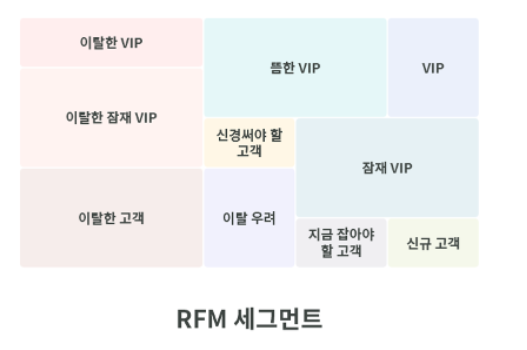

phase3 협업필터링 혹은 matrix factorization

- user_item 행렬만들기
- 기존에는 평점이었지만 이번에는 얼마를 구매할지? 아니면 몇개를 살지? 얘네를 기준으로 삼아서 예측하기
- https://github.com/journey101/Recommendation_CF_Hybrid_Modeling_with_Python_Surprise/blob/main/Recommendation_CF_Hybrid_modeling_for_Fashion_update(210524).ipynb

In [ ]:
customer.to_csv('customer2.csv',index = False)
product.to_csv('product2.csv',index = False)
click_stream_new.to_csv('click_stream_new2.csv',index = False)
transaction_new.to_csv('transaction_new2.csv',index = False)

# CB 모델링 
- 통계적 모델 생성 
- 신규 사용자를 위한 모델
- 판매량, 할인율, 가격, 카테고리, 성별, 나이로 모델링 해보자
- 먼저 구매할 상품을 입력하면 그걸 받아서 카테고리와 관련된 추천시작함
- 카테고리 보다는 서브카테고리로 검색을 하는게 진짜 쇼핑몰 이용하는 것 같다

- 주의) 신규사용자 즉 로그인을 안한 사용자이니 우리는 그 사람에 대해 아무것도 모름 그러니 customer정보는 쓰지 않음. 즉 검색에 사용되는 단어만 가지고 추천을 하게됨


- 클래스의 형태로 만들어서 검색어를 입력(생성자)하면
- 함수화된 추천시스템이 발동 ( 가격순, 할인순, 판매량순, 검색량 등등)
- 홈페이지에서는 여러개를 소개함

---
1. 판매량
- 높은 판매율의 상품을 추천하기
- 이때 도매/소매 쪽이 포함될 수 있으니 이를 유의하자 
  - 확인 결과 40개정도는 나오지만 이 정도는 엄청 크다고는 할 수 없으니 일단 보류
- 특정 아이템을 구매하려고 하는 경우에 그 상품에 해당하면서 판매량이 높은 상품을 추천


2. 높은 할인율
- 할인율이 높은 상품 추천하기

3. 가격
- 낮은 가격

4. 최근순
- 제품이 만들어진 시기


- 원하는 상품 입력
- 입력된 상품들사이에서 판매량이 높은 상품 출력

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#분석에 쓰일 product와 transaction데이터를 병합한 새로운 데이터 프레임 생성

m_df_p = pd.merge(transaction_new,product,on = 'product_id')

In [ ]:
m_df_p.to_csv('product_transaction_merged.csv',index = False)

원하는 상품을 입력하면 그 상품의 상위 판매량 10개의 상품을 추천함

In [ ]:
print("-" * 250)
s = input('원하는 상품 입력 : ')
print("-" * 250)


#m_df_p = pd.merge(transaction_new,product,on = 'product_id')
#cat_pro = product['masterCategory'].unique()
# temp_df = product[product['masterCategory'] == cat_pro[s]]

#해당 카테고리의 상위 판매량이 높은 상위 10개 추출
a = m_df_p[m_df_p['articleType'] == s].groupby('product_id').sum().sort_values('total_amount',ascending = False).head(10).index



li = []

for i in range(10):
  li.append(product[product['product_id'] == a[i]].index[0])

product.iloc[li,:]


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
원하는 상품 입력 : Ring
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


product_id gender masterCategory subCategory articleType baseColour  \
21862       49018  Women    Accessories   Jewellery        Ring     Silver   
26439       49009  Women    Accessories   Jewellery        Ring     Silver   
22960       48948    Men    Accessories   Jewellery        Ring      Steel   
25008       59464  Women    Accessories   Jewellery        Ring     Silver   
2871        48928  Women    Accessories   Jewellery        Ring     Silver   
20600       48994  Women    Accessories   Jewellery        Ring     Silver   
22988       59462  Women    Accessories   Jewellery        Ring     Silver   
23366       59465  Women    Accessories   Jewellery        Ring     Silver   
20555       48960    Men    Accessories   Jewellery        Ring      Steel   
40030       59470  Women    Accessories   Jewellery        Ring       Gold   

       season  year   usage  
21862    Fall  2012  Casual  
26439  Summer  2012  Casual  
22960  Summer  2013  Casual  
25008  Summer  2015  Casual  
2871   Summer  2012  Casual  
20600  Summer  2012  Casual  
22988  Summer  2015  Casual  
23366  Summer  2015  Casual  
20555  Summer  2013  Casual  
40030  Summer  2013  Casual

할인율이 높은 특가 상품 추천하기
- 이때 기존 가격과 할인율도 같이 보여주자

In [ ]:
print("-" * 250)
s = input('원하는 상품 입력 : ')
print("-" * 250)



a = m_df_p[m_df_p['articleType'] == s].sort_values('promo_amount',ascending = False).head(10)

c= product.columns.tolist()
c.append('promo_amount')
c.append('total_amount')

a[c]


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
원하는 상품 입력 : Sports Shoes
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


product_id gender masterCategory subCategory   articleType  \
156203        36460    Men       Footwear       Shoes  Sports Shoes   
737049         5243    Men       Footwear       Shoes  Sports Shoes   
790116        22984    Men       Footwear       Shoes  Sports Shoes   
1071648       36139    Men       Footwear       Shoes  Sports Shoes   
106296        26667  Women       Footwear       Shoes  Sports Shoes   
68347         12693  Women       Footwear       Shoes  Sports Shoes   
437554         8966    Men       Footwear       Shoes  Sports Shoes   
45238         11931    Men       Footwear       Shoes  Sports Shoes   
121023        25461    Men       Footwear       Shoes  Sports Shoes   
305854        26682    Men       Footwear       Shoes  Sports Shoes   

        baseColour  season  year   usage  promo_amount  total_amount  
156203       White  Summer  2013  Sports         24326       1281640  
737049       Black  Summer  2011  Sports         21770        357899  
790116       White    Fall  2011  Sports         20733       1556314  
1071648      Black  Summer  2012  Sports         20055       1014764  
106296       White  Summer  2012  Sports         19911       3854182  
68347        White  Summer  2012  Sports         19904        180260  
437554      Yellow    Fall  2011  Sports         19728        189724  
45238        Black    Fall  2011  Sports         19714        344418  
121023        Grey  Summer  2012  Sports         19684         98430  
305854       Black  Summer  2012  Sports         19660        188689

In [ ]:
## 클래스 구현해보기
## 뭔가... 애매함 그냥 함수만 사용해보자
class Search:
    # df_total
    # df_promote
  
  def __init__(self):
    print("-" * 250)
    self.s = input('원하는 상품 입력 :')




  def total_amount(self):


    #m_df_p = pd.merge(transaction_new,product,on = 'product_id')
    #cat_pro = product['masterCategory'].unique()
    # temp_df = product[product['masterCategory'] == cat_pro[s]]

    #해당 카테고리의 상위 판매량이 높은 상위 10개 추출
    a = m_df_p[m_df_p['articleType'] == s].groupby('product_id').sum().sort_values('total_amount',ascending = False).head(10).index



    li = []

    for i in range(10):
      li.append(product[product['product_id'] == a[i]].index[0])

    self.df_total = product.iloc[li,:]
    return  pd.DataFrame(self.df_total)

  def promote_amout(self):
    self.b = m_df_p[m_df_p['articleType'] == self.s].sort_values('promo_amount',ascending = False).head(10)

    self.c= product.columns.tolist()
    self.c.append('promo_amount')
    self.c.append('total_amount')

    df_promote = self.b[self.c]

    return  pd.DataFrame(self.df_promote)


In [ ]:
k = Search()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
원하는 상품 입력 :Sports Shoes


프로그램 과정

<br>1.검색 > 쿼리에 저장</br> 
<br>2.기본 판매량 높은 순의 데이터를 보여줌</br> 
<br>3.옆에 할인율 높은 순이나 다른 버튼을 누르면 해당 데이터를 보여주게끔</br> 

In [ ]:
def tt(s):


  #m_df_p = pd.merge(transaction_new,product,on = 'product_id')
  #cat_pro = product['masterCategory'].unique()
  # temp_df = product[product['masterCategory'] == cat_pro[s]]

  #해당 카테고리의 상위 판매량이 높은 상위 10개 추출
  a = m_df_p[m_df_p['articleType'] == s].groupby('product_id').sum().sort_values('total_amount',ascending = False).head(10).index



  li = []

  for i in range(10):
    li.append(product[product['product_id'] == a[i]].index[0])

  df_total = product.iloc[li,:]
  return  pd.DataFrame(df_total)


In [ ]:
def promote_amout(s):
  b = m_df_p[m_df_p['articleType'] == s].sort_values('promo_amount',ascending = False).head(10)

  c= product.columns.tolist()
  c.append('promo_amount')
  c.append('total_amount')

  df_promote = b[c]

  return  pd.DataFrame(df_promote)

In [ ]:
def item_price_top(s):
  d = m_df_p[m_df_p['articleType'] == s].sort_values('item_price',ascending = False).head(10)

  c= product.columns.tolist()
  c.append('item_price')
  df_item = d[c]

  return  pd.DataFrame(df_item)

In [ ]:
def item_price_bot(s):
  d = m_df_p[m_df_p['articleType'] == s].sort_values('item_price',ascending = True).head(10)

  c= product.columns.tolist()
  c.append('item_price')
  df_item = d[c]

  return  pd.DataFrame(df_item)

In [ ]:
def item_year(s):
  e = m_df_p[m_df_p['articleType'] == s].sort_values('year',ascending = False).head(10)
  c= product.columns.tolist()

  df_year = e[c]

  return pd.DataFrame(df_year) 

program
1. 검색어를 입력한다. ex) Tshirts
2. 원하는 추천 모드 선택 ex) 할인순

In [ ]:
def program():
  print("-" * 250)
  s = input('원하는 상품 입력 :')
  k = input('| 판매량순 | 할인순 | 높은가격순 | 낮은가격순 | 최근일순 |')

  if k == '판매량순':
    return tt(s)
  
  elif k == '할인순':
    return promote_amout(s)

  elif k == '높은가격순':
    return item_price_top(s)
  
  elif k == '낮은가격순':
    return item_price_bot(s)

  elif k == '최근일순':
    return item_year(s)
   



In [ ]:
program()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
원하는 상품 입력 :Tshirts
| 판매량순 | 할인순 | 높은가격순 | 낮은가격순 | 최근일순 |최근일순


product_id gender masterCategory subCategory articleType  \
663703       27430  Women        Apparel     Topwear     Tshirts   
663714       27430  Women        Apparel     Topwear     Tshirts   
663708       27430  Women        Apparel     Topwear     Tshirts   
663704       27430  Women        Apparel     Topwear     Tshirts   
663707       27430  Women        Apparel     Topwear     Tshirts   
663719       27430  Women        Apparel     Topwear     Tshirts   
663718       27430  Women        Apparel     Topwear     Tshirts   
663717       27430  Women        Apparel     Topwear     Tshirts   
663716       27430  Women        Apparel     Topwear     Tshirts   
663715       27430  Women        Apparel     Topwear     Tshirts   

          baseColour  season  year   usage  
663703  Grey Melange  Summer  2018  Casual  
663714  Grey Melange  Summer  2018  Casual  
663708  Grey Melange  Summer  2018  Casual  
663704  Grey Melange  Summer  2018  Casual  
663707  Grey Melange  Summer  2018  Casual  
663719  Grey Melange  Summer  2018  Casual  
663718  Grey Melange  Summer  2018  Casual  
663717  Grey Melange  Summer  2018  Casual  
663716  Grey Melange  Summer  2018  Casual  
663715  Grey Melange  Summer  2018  Casual

유제 세그멘테이션 

인구 통계학적 세그멘테이션 
- 성별, 나이, 사는 곳등 호구조사와 같은 특성과 기반함
- 쉽게 분리가 가능함
- 쉬운만큼 분석에 큰 인사이트는 도출하지 못함 
ex) 주 고객층이 20대 여성이다! 근데 이걸로 무언가 특출난 것을 할 수는 없다.


행동 기반 세그멘테이션

- 고객의 행동에 따라 고객을 분리
- 결과의 신뢰성이나 대표성이 더 높고 인사이트를 도출 할 수 있다.

ex) 로그인후에 액션을 기준으로 세그멘테이션
- 별다른 액션없이 이탈하는 이탈 사용자
- 다양한 상품을 클릭하지만 구매는 하지 않는 탐색 사용자
- 다양한 상품을 클릭하고 구매까지 하는 쇼핑 사용자
- 탐색없이 구매로 바로 이어지는 확신 사용자

>>여기서 중요한 것은 확신사용자의 비율을 높이는 것이라 할 수 있겠다!!

- **매출의 증대'**를 위해 분석을 통해 아래와 같이 생각해보고, 추가적인 정보를 바탕으로 실험을 반복합니다.
- 고객이 원하는 컨텐츠는 무엇일까?
- 고객의 행동을 어떻게 해석해야 할까?
- 어떤 추천 시스템을 적용해야 할까?


로그인을 한다. 여기서는 input으로 customer_id를 입력받는다.  
- 이때 인구통계학적 세그멘테이션으로 고객을 세분화한다.
- 나이, 성별정도로 나누자 사는 지역이나 핸드폰의 타입은 아직 쓸만해 보이지는 않는다.

매출의 증대를 위해서 
- 고객의 비율을 살펴서 주 고객층이 누군인지 파악하기
- 제일 비율이 없는 고객층을 찾아서 원인 분석
- 나눠진 집단마다 원하는 컨텐츠 즉 많이 팔리는 것을 알아보자

### 인구통계학적 세그멘테이션

In [ ]:
customer.head(3)

customer_id gender  birthdate device_type        home_location  \
0         2870      F         28         iOS       Sumatera Barat   
1         8193      F         31     Android         Jakarta Raya   
2         7279      M         35         iOS  Nusa Tenggara Barat   

   first_join_date  
0             2019  
1             2017  
2             2020

In [ ]:
#성별을 살펴보니 여성이 남성의 약 2배로 여성이 주 고객층이다.

customer['gender'].value_counts()

F    64230
M    35770
Name: gender, dtype: int64

In [ ]:
#year_10은 나이가 10대 그룹, ... year_50은 50세 이상 그룹


year_10 = customer.query("(birthdate < 20)")

year_20 = customer.query("(birthdate >= 20) and (birthdate < 30)")

year_30 = customer.query("(birthdate >= 30) and (birthdate < 40)")

year_40 = customer.query("(birthdate >= 40) and (birthdate < 50)")

year_50 = customer.query("(birthdate >= 50)")


- 60대는 39명 70대는 1명 80대는 0명이니 그냥 50대이상의 그룹으로 통일하자

In [ ]:
year_10[year_10['gender'] == 'F']

customer_id gender  birthdate device_type   home_location  \
7            96453      F         19     Android        Bengkulu   
23            3460      F         19         iOS  Kepulauan Riau   
29           23711      F         18         iOS    Jakarta Raya   
31           87704      F         15     Android  Sulawesi Utara   
43           52389      F         17     Android  Sumatera Utara   
...            ...    ...        ...         ...             ...   
99933        76899      F         18     Android      Jawa Barat   
99935        91218      F         17     Android          Maluku   
99938        85041      F         15     Android          Maluku   
99971        20572      F         15         iOS          Maluku   
99979        64054      F         12     Android    Jakarta Raya   

       first_join_date  
7                 2022  
23                2017  
29                2022  
31                2021  
43                2019  
...                ...  
99933             2019  
99935             2019  
99938             2021  
99971             2022  
99979             2021  

[6024 rows x 6 columns]

In [ ]:
df_year = pd.DataFrame({'Male' : [year_10[year_10['gender'] == 'M'].shape[0],year_20[year_20['gender'] == 'M'].shape[0],year_30[year_30['gender'] == 'M'].shape[0],year_40[year_40['gender'] == 'M'].shape[0],year_50[year_50['gender'] == 'M'].shape[0]],
              'Female' :[year_10[year_10['gender'] == 'F'].shape[0],year_20[year_20['gender'] == 'F'].shape[0],year_30[year_30['gender'] == 'F'].shape[0],year_40[year_40['gender'] == 'F'].shape[0],year_50[year_50['gender'] == 'F'].shape[0]],
              'Sum' : [year_10.shape[0],year_20.shape[0],year_30.shape[0],year_40.shape[0],year_50.shape[0]] },
              index = [10,20,30,40,50])
df_year

Male  Female    Sum
10   3296    6024   9320
20  17533   31831  49364
30  12111   21552  33663
40   2558    4371   6929
50    272     452    724

분석결과 
- 20대가 주 고객층이다
- 20대 여성이 제일 많아서 타겟 고객이라고 할 수 있겠다.


별다른 액션없이 이탈하는 이탈 사용자
다양한 상품을 클릭하지만 구매는 하지 않는 탐색 사용자
다양한 상품을 클릭하고 구매까지 하는 쇼핑 사용자
탐색없이 구매로 바로 이어지는 확신 사용자

In [ ]:
click_stream_new.head()

session_id   event_name event_time  \
0  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c     HOMEPAGE   15:54:32   
1  fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c       SCROLL   16:03:57   
2  7d440441-e67a-4d36-b324-80ffd636d166     HOMEPAGE   12:05:10   
3  7d440441-e67a-4d36-b324-80ffd636d166  ADD_TO_CART   12:06:33   
4  7d440441-e67a-4d36-b324-80ffd636d166      BOOKING   12:15:29   

                               event_id traffic_source  product_id  quantity  \
0  9c4388c4-c95b-4678-b5ca-e9cbc0734109         MOBILE         0.0       0.0   
1  4690e1f5-3f99-42d3-84a5-22c4c4d8500a         MOBILE         0.0       0.0   
2  88aeaeb5-ec98-4859-852c-8abb483faf31         MOBILE         0.0       0.0   
3  934e306e-ecc6-472f-9ccb-12c8536910a2         MOBILE     15315.0       4.0   
4  9f4767a1-40fa-4c9c-9524-dfad18634d56         MOBILE         0.0       0.0   

   item_price payment_status search_keywords promo_code  promo_amount  \
0         0.0              0               0          0           0.0   
1         0.0              0               0          0           0.0   
2         0.0              0               0          0           0.0   
3    313529.0              0               0          0           0.0   
4         0.0        Success               0          0           0.0   

   event_date  
0  2019-09-06  
1  2019-09-06  
2  2019-09-01  
3  2019-09-01  
4  2019-09-01

In [ ]:
click_stream_new['event_name'].unique()

array(['HOMEPAGE', 'SCROLL', 'ADD_TO_CART', 'BOOKING', 'SEARCH',
       'ITEM_DETAIL', 'ADD_PROMO', 'CLICK', 'PROMO_PAGE'], dtype=object)

RFM으로 고객 4분할 하기
- 얘는 아직 가중치를 안줌 RFM중에 어떤것에 가중치를 줘야할지는 계속 찾아봐야 할듯
- 빈도수와 총 구매 금액은 그냥 groupby.sum()으로 가능함 
- 최근 구매일은 최근 구매일을 그냥 숫자로 해서 2018-12-01은 20181201로 바꿔보자
- 제일 큰 값이 제일 최근이라고 할 수 있음
- transaction데이터로 하는데 구매내역이 없는 가입 이용자는 자연스럽게 나눠지게됨 얘도 새로운 분류에 속할 수 있음
(https://tableauwiki.com/rfm/)

In [ ]:
transaction_new.head()

customer_id                            session_id payment_method  \
0         5868  3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card   
1         4774  2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card   
2         4774  93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO   
3         4774  bcad5a61-1b67-448d-8ff4-781d67bc56e4    Credit Card   
4         4774  df1042ab-13e6-4072-b9d2-64a81974c51a    Credit Card   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0            0         10000   
2        Success             0            0         10000   
3        Success             0            0             0   
4        Success             0            0             0   

           shipment_date_limit  total_amount  product_id  quantity  \
0  2018-08-03T05:07:24.812676Z        199832       54728         1   
1  2018-08-03T01:29:03.415705Z        155526       16193         1   
2  2018-09-18T08:41:49.422380Z        550696       53686         4   
3  2018-11-05T17:42:27.954235Z        271012       20228         1   
4  2018-12-23T17:24:07.361785Z        198753       55220         1   

   item_price created_at_date created_at_time  
0      191247      2018-07-29        15:22:01  
1      145526      2018-07-30        12:40:22  
2      135174      2018-09-15        11:51:17  
3      271012      2018-11-01        11:23:48  
4      198753      2018-12-18        11:20:30

In [ ]:
temp = list(map(int,list(map(lambda x : x.replace('-',''),transaction_new['created_at_date'].tolist()))))
transaction_new['recency '] = temp

In [ ]:
transaction_new.head(3)

customer_id                            session_id payment_method  \
0         5868  3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card   
1         4774  2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card   
2         4774  93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0            0         10000   
2        Success             0            0         10000   

           shipment_date_limit  total_amount  product_id  quantity  \
0  2018-08-03T05:07:24.812676Z        199832       54728         1   
1  2018-08-03T01:29:03.415705Z        155526       16193         1   
2  2018-09-18T08:41:49.422380Z        550696       53686         4   

   item_price created_at_date created_at_time  recency   
0      191247      2018-07-29        15:22:01  20180729  
1      145526      2018-07-30        12:40:22  20180730  
2      135174      2018-09-15        11:51:17  20180915

In [ ]:
# 빈도수와 

df_rfm = transaction_new.groupby('customer_id').sum()

In [ ]:
df_rfm.head(3)

promo_amount  shipment_fee  total_amount  product_id  quantity  \
customer_id                                                                   
3                  183397        495000      45842098     2211567        88   
8                    7699         55000       4758601      274952        19   
9                       0         45000       4113630      255771        10   

             item_price    recency   
customer_id                          
3              17068470  1434424966  
8               2017239   161704959  
9               2470745   161715336

In [ ]:
df_rfm.describe()

promo_amount  shipment_fee  total_amount    product_id      quantity  \
count  5.070500e+04  5.070500e+04  5.070500e+04  5.070500e+04  50705.000000   
mean   5.064548e+04  2.274078e+05  2.923547e+07  7.348902e+05     36.498846   
std    1.053349e+05  4.134738e+05  6.426486e+07  1.315387e+06     65.676967   
min    0.000000e+00  0.000000e+00  2.745000e+04  1.163000e+03      1.000000   
25%    2.425000e+03  2.000000e+04  9.094500e+05  7.056200e+04      3.000000   
50%    1.285800e+04  7.000000e+04  5.144328e+06  2.501020e+05     12.000000   
75%    5.048600e+04  2.450000e+05  2.691191e+07  7.993530e+05     40.000000   
max    3.022499e+06  8.390000e+06  1.116077e+09  2.391192e+07   1259.000000   

         item_price      recency   
count  5.070500e+04  5.070500e+04  
mean   6.185074e+06  4.998967e+08  
std    1.105192e+07  8.927793e+08  
min    2.454600e+04  2.016070e+07  
25%    6.017030e+05  4.044102e+07  
50%    2.107734e+06  1.617643e+08  
75%    6.766323e+06  5.454759e+08  
max    2.048702e+08  1.629443e+10

### rfm결과 각각의 사분위수 기준

빈도수 
- 0 ~3 
- 3 ~ 12 
- 12 ~ 40
- 40 ~

총금액
- 0 ~ 909450.0
- 909450.0 ~ 5144328.0
- 5144328.0 ~ 26911910.0
- 26911910.0 ~

최근구매일
- 20210810 이전
- 20210810 ~ 20220410 사이
- 20220410 ~ 20220620 사이
- 20220620 이후


각각의 기준에 맞춰서 사용자마다 해당기준에 맞으면 1 ~ 4점의 점수를 줘서 분리해보자



In [ ]:
# 해결해야할 문제 5만명 정도는 거래 기록이 있어서 이걸로 분리할 수 있지만
# 나머지 5만명은 거래기록이 없다. 이 경우에는 5만명은 인구통계적 기준을 써보자
# 또한 거래기록도 별로 없는 유저는 svd나 여러 방법을 쓰지 못하는데 이떄는 어떻게 해야할까??  

print(customer.shape[0],df_rfm.shape[0])

100000 50705


In [ ]:
# rfm 데이터 프레임을 만들어 놓고 점수를 저장하자
# 약 5만명정도 데이터가 있는데 5만명은 거래내역이 있는 5만명을 의미한다. 
# 10만 customer중에서 5만은 거래내역이 없다

rfm = np.zeros((50705,3))
rfm = pd.DataFrame(rfm)
rfm.columns = ['Recency','Frequency','Monetary']
rfm.index = df_rfm.index.tolist()

In [ ]:
# 최근 구매일을 위해서 기존에 sum()을 적용한 df_rfm에 max를 적용시킨 것을 적용하기

temp_rec = transaction_new.groupby('customer_id').max()
df_rfm.iloc[:,6] = temp_rec.iloc[:,13]

In [ ]:
#빈도수에 따라서 점수계산하는 함수 구현

def cal_fec(a):
  if a < 3:
    return 1
  elif a >=3 and a <12:
    return 2
  elif a >=12 and a < 40:
    return 3
  else:
    return 4

In [ ]:
# 최근구매일에 따라서 점수계산하는 함수 구현

def cal_rec(a):
  if a < 20210810:
    return 1
  elif a >=20210810  and a < 20220410 :
    return 2
  elif a >=20220410  and a < 20220620 :
    return 3
  else:
    return 4


In [ ]:
# 총 쓴 금액에 따라서 점수계산하는 함수 구현

def cal_mon(a):
  if a < 909450:
    return 1
  elif a >=909450  and a < 5144328 :
    return 2
  elif a >=5144328  and a < 26911910 :
    return 3
  else:
    return 4

In [ ]:
df_rfm.head()

promo_amount  shipment_fee  total_amount  product_id  quantity  \
customer_id                                                                   
3                  183397        495000      45842098     2211567        88   
8                    7699         55000       4758601      274952        19   
9                       0         45000       4113630      255771        10   
11                   9492         15000        197533       21536         1   
15                  16362         90000       6447246      140707         9   

             item_price  recency   
customer_id                        
3              17068470  20220626  
8               2017239  20220515  
9               2470745  20220528  
11               192025  20220307  
15              2101232  20220105

In [ ]:
df_rfm.loc[3]['total_amount']

45842098

In [ ]:
# transaction에서 거래내역이 있는 고객마다 반복문으로 뽑아서 rfm을 계산해서 점수를 매겨서 새로운 데이터 프레임을 만들자
# 이때 sum을 이미 하여서 고객들은 전체거래내역이 있어서 이걸로 계산함


for i in df_rfm.index.tolist():   
  temp_q = cal_fec(df_rfm.loc[i]['quantity'])
  temp_r = cal_rec(df_rfm.loc[i]['recency '])
  temp_m = cal_mon(df_rfm.loc[i]['total_amount'])

  rfm.loc[i] = [temp_r,temp_q,temp_m]





In [ ]:
rfm_sum = rfm.apply(func=sum,axis = 1)
rfm_sum.describe()

count    50705.000000
mean         7.573494
std          3.047271
min          3.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
dtype: float64

In [ ]:
rfm_sum

3        12.0
8         8.0
9         7.0
11        4.0
15        7.0
         ... 
99992     9.0
99995    12.0
99997     3.0
99998     9.0
99999     3.0
Length: 50705, dtype: float64

In [ ]:
def four_group(a):
  if a < 5:
    return 'extinct customer'
  elif a >=5 and a <8:
    return 'customer'
  elif a >=8 and a < 10:
    return 'vip'
  else:
    return 'vvip'

In [ ]:
four_group(rfm_sum.loc[i])

In [ ]:
# rfm 사분위수 결과 
# vvip/ vip/ 일반 / 이탈우려고객
# 이렇게 분리 할 수 있겠다.
li = []

for i in rfm.index.tolist():
  temp = four_group(rfm_sum.loc[i])
  li.append(temp)


rfm['group'] = li

In [ ]:
# rfm 저장하기 

rfm.to_csv('rfm2.csv',index = False)

In [ ]:
rfm

Recency  Frequency  Monetary             group
3          4.0        4.0       4.0              vvip
8          3.0        3.0       2.0               vip
9          3.0        2.0       2.0          customer
11         2.0        1.0       1.0  extinct customer
15         2.0        2.0       3.0          customer
...        ...        ...       ...               ...
99992      3.0        3.0       3.0               vip
99995      4.0        4.0       4.0              vvip
99997      1.0        1.0       1.0  extinct customer
99998      2.0        3.0       4.0               vip
99999      1.0        1.0       1.0  extinct customer

[50705 rows x 4 columns]

In [ ]:
# 그룹화 하기 이때 얘네의 고객번호를 이용해서 transaction데이터에서 그룹화를 다시 할 수 있다


grop_extinct_customer = rfm[rfm['group'] == 'extinct customer']
grop_customer = rfm[rfm['group'] == 'customer']
grop_vip = rfm[rfm['group'] == 'vip']
grop_vvip = rfm[rfm['group'] == 'vvip']



In [ ]:
# 사분위로 분리해서 어느정도 잘 분리 된 모습

grop_extinct_customer.shape[0],grop_customer.shape[0],grop_vip.shape[0],grop_vvip.shape[0]

(10694, 13844, 9918, 16249)

### svd를 이용한 상품 추천 하기
- 그룹화된 그룹내에서 추천하는 걸로 해보자
- 먼저 user-product 행렬이 필요하다 얘를 만들자
- 어떤 유저는 어떤 상품을 어떻게 샀나를 기준으로 만들 수 있을 것 같다. 
- 1번 유저는 1번 상품을 몇개 샀다 이런식으로...
- 근데 이러면 너무 데이터가 적을 것 같다. 일단 해보고 다시 결정하자

In [ ]:
extinct_customer_idx = rfm[rfm['group'] == 'extinct customer'].index
customer_idx = rfm[rfm['group'] == 'customer'].index
vip_idx = rfm[rfm['group'] == 'vip'].index
vvip_idx = rfm[rfm['group'] == 'vvip'].index

In [ ]:
transaction_new.shape[0]

1254585

반복문으로 각 trasaction_new를 하나씩 빼서 그룹화해서 소속된 그룹 이름을 넣기

In [ ]:
li = []

for i in range(1254585):
  temp_c = transaction_new.loc[i]['customer_id']
  if temp_c in extinct_customer_idx:
    li.append('extinct customer')
    pass
  elif temp_c in customer_idx:
    li.append('customer')
    pass
  elif temp_c in vip_idx:
    li.append('vip')
    pass
  else:
    li.append('vvip')


In [ ]:
transaction_new['group'] = li

In [ ]:
transaction_new.head(3)

customer_id                            session_id payment_method  \
0         5868  3abaa6ce-e320-4e51-9469-d9f3fa328e86     Debit Card   
1         4774  2ee5ead1-f13e-4759-92df-7ff48475e970    Credit Card   
2         4774  93325fb6-eb00-4268-bb0e-6471795a0ad0            OVO   

  payment_status  promo_amount   promo_code  shipment_fee  \
0        Success          1415  WEEKENDSERU         10000   
1        Success             0            0         10000   
2        Success             0            0         10000   

           shipment_date_limit  total_amount  product_id  quantity  \
0  2018-08-03T05:07:24.812676Z        199832       54728         1   
1  2018-08-03T01:29:03.415705Z        155526       16193         1   
2  2018-09-18T08:41:49.422380Z        550696       53686         4   

   item_price created_at_date created_at_time  recency              group  
0      191247      2018-07-29        15:22:01  20180729  extinct customer  
1      145526      2018-07-30        12:40:22  20180730              vvip  
2      135174      2018-09-15        11:51:17  20180915              vvip

In [ ]:
transaction_new.to_csv('transaction_new3.csv',index = False)

In [ ]:
# vvip에 다 거래데이터가 몰려 있는데 괜찮은지는 아직 모르겠다.

transaction_new['group'].value_counts()

vvip                1040041
vip                  134588
customer              65306
extinct customer      14650
Name: group, dtype: int64

https://supkoon.tistory.com/28

### 중간 런타임 실행지점

In [ ]:
trans_extinct_customer = transaction_new[transaction_new['group'] == 'extinct customer']

trans_customer = transaction_new[transaction_new['group'] == 'customer']

trans_vip = transaction_new[transaction_new['group'] == 'vip']

trans_vvip = transaction_new[transaction_new['group'] == 'vvip']

customer_id  product_id  quantity             group
0               5868       54728         1  extinct customer
196            81104       35986         1  extinct customer
197            47040       11852         1  extinct customer
198            47040       25124         1  extinct customer
199            47040       46609         1  extinct customer
...              ...         ...       ...               ...
1254577        16528       25724         1  extinct customer
1254578        77554       28377         1  extinct customer
1254581        34829       19394         1  extinct customer
1254583        87319       11312         1  extinct customer
1254584        58180       47433         1  extinct customer

[14650 rows x 4 columns]

In [ ]:
product.set_index('product_id',inplace= True)

In [ ]:
trans_extinct_customer_1 = trans_extinct_customer[['customer_id','product_id','quantity','group']]
trans_customer_1 = trans_customer[['customer_id','product_id','quantity','group']]
trans_vip_1 = trans_vip[['customer_id','product_id','quantity','group']]
trans_vvip_1 = trans_vvip[['customer_id','product_id','quantity','group']]


In [ ]:
len(set(trans_extinct_customer_1['customer_id'])),len(set(trans_extinct_customer_1['product_id']))

(10694, 12437)

In [ ]:
k = np.zeros((10694,12437))
k

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
k = pd.DataFrame(k)
k.index = set(trans_extinct_customer_1['customer_id'].tolist())
k.columns = set(trans_extinct_customer_1['product_id'].tolist())

In [ ]:
# 거래기록을 하나씩 가져와서 해당 상품과 해당 사용자에 +를 해줌


for i in trans_extinct_customer_1.index:
  temp_user = trans_extinct_customer_1.loc[i]['customer_id']
  temp_product = trans_extinct_customer_1.loc[i]['product_id']
  temp_q = trans_extinct_customer_1.loc[i]['quantity']

  if temp_product in product.index:
    k.loc[temp_user,temp_product] += temp_q

In [ ]:
# 완성된 1단계 사용자의 user-product 행렬 

k.head(3)

32801  32809  32810  32811  32816  32817  32828  32830  32837  32839  \
65539    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
98311    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
98312    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  32685  32717  32729  32738  32742  32744  32759  32763  32766  \
65539  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
98311  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
98312  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       32767  
65539    0.0  
98311    0.0  
98312    0.0  

[3 rows x 12437 columns]

In [ ]:
k.to_csv('extinct_customer_matrix2.csv')

일반 customer 행렬만들기

In [ ]:
len(set(trans_customer_1['customer_id'])),len(set(trans_customer_1['product_id']))

(13844, 34199)

In [ ]:
k2_2 = np.zeros((13844,34199))

In [ ]:
k2_2 = pd.DataFrame(k2_2)
k2_2.index = sorted(list(set(trans_customer_1['customer_id'].tolist())))
k2_2.columns = sorted(list(set(trans_customer_1['product_id'].tolist())))

In [ ]:
for i in trans_customer_1.index:
  temp_user = trans_customer_1.loc[i]['customer_id']
  temp_product = trans_customer_1.loc[i]['product_id']
  temp_q = trans_customer_1.loc[i]['quantity']

  if temp_product in product.index:
    k2_2.loc[temp_user,temp_product] += temp_q

In [ ]:
list(range(0,13844))

13844

In [ ]:
k2_2.index = list(range(0,13844))

In [ ]:
k2_2

1163   1164   1165   1525   1526   1528   1530   1531   1533   1534   \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13839    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13840    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13841    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13842    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13843    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59984  59986  59988  59989  59990  59991  59992  59994  59996  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
13839  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13840  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13841  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13842  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
13843  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       60000  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
13839    0.0  
13840    0.0  
13841    0.0  
13842    0.0  
13843    0.0  

[13844 rows x 34199 columns]

In [ ]:
k2.to_csv('customer_matrix2.csv')

In [ ]:
len(set(trans_vip_1['customer_id'])),len(set(trans_vip_1['product_id']))

(9918, 42320)

In [ ]:
k3 = np.zeros((9918,42320))

In [ ]:
k3 = pd.DataFrame(k3)
k3.index = set(trans_vip_1['customer_id'].tolist())
k3.columns = set(trans_vip_1['product_id'].tolist())

In [ ]:
for i in trans_vip_1.index:
  temp_user = trans_vip_1.loc[i]['customer_id']
  temp_product = trans_vip_1.loc[i]['product_id']
  temp_q = trans_vip_1.loc[i]['quantity']

  if temp_product in product.index:
    k3.loc[temp_user,temp_product] += temp_q

In [ ]:
k3.to_csv('vip_matrix2.csv')

In [ ]:
len(set(trans_vvip_1['customer_id'])),len(set(trans_vvip_1['product_id']))

(16249, 44446)

In [ ]:
k4 = np.zeros((16249,44446))

In [ ]:
k4 = pd.DataFrame(k4)
k4.index = set(trans_vvip_1['customer_id'].tolist())
k4.columns = set(trans_vvip_1['product_id'].tolist())

In [ ]:
for i in trans_vvip_1.index:
  temp_user = trans_vvip_1.loc[i]['customer_id']
  temp_product = trans_vvip_1.loc[i]['product_id']
  temp_q = trans_vvip_1.loc[i]['quantity']

  if temp_product in product.index:
    k4.loc[temp_user,temp_product] += temp_q

In [ ]:
k4.to_csv('vvip_matrix2.csv')

In [ ]:
k2.index

Int64Index([98304, 98307, 32772, 98310,     9, 98316,    15, 32783, 32785,
            98322,
            ...
            65509, 98282, 65515, 32748, 98285, 65518, 65523, 98292, 98296,
            65531],
           dtype='int64', length=13844)

In [ ]:
k2.index.tolist().sort()

In [ ]:
aaa = k2.index.tolist()
aaa.sort()
aaa


13844

In [ ]:
k2.index = list(range(0,13844))

13844

In [ ]:
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

https://github.com/benfred/implicit

https://velog.io/@tobigs-recsys/DL-based-Recommender-Systems-%EB%94%A5%EB%9F%AC%EB%8B%9D-%EA%B8%B0%EB%B0%98-%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C

https://supkoon.tistory.com/28

# implicit를 이용한 추천모델링 하기
- 그전에 coo_matrix로 희소행렬을 처리해야 함 ( https://radish-greens.tistory.com/1)(https://leebaro.tistory.com/entry/scipysparsecoomatrix)
- 


In [ ]:
pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 76.1 MB/s eta 0:00:00


In [ ]:
import implicit
import scipy
#temp_k2 = scipy.sparse.coo_matrix(k2)
temp_k2_2 = scipy.sparse.coo_matrix(k2_2)

#temp_k4 = scipy.sparse.coo_matrix(k4)

In [ ]:
import implicit

# initialize a model
model = implicit.als.AlternatingLeastSquares(factors=50)
#model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20)

In [ ]:
#모델 FIT하기

# train the model on a sparse matrix of user/item/confidence weights
#model.fit(temp_k4.T)
model.fit(temp_k2_2)


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007927417755126953 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
# 사용자에게 아이템 추천해주기
# recommend items for a user
#recommendations = model.recommend(userid, user_item_data[userid])


# model.recommend(3, temp_k4.tocsr()[3])
#model.recommend(3, temp_k4.T.tocsr()[3])
#model.recommend(38579, temp_k2.T.tocsr()[3])
model.recommend(13000, temp_k2_2.tocsr()[13000])

(array([11651,  3678, 11604, 14581, 12899,  5452, 11127, 18583, 16157,
         4365], dtype=int32),
 array([0.00032406, 0.00029037, 0.00027589, 0.00022354, 0.00020937,
        0.00016119, 0.00015593, 0.00015302, 0.00015116, 0.00014938],
       dtype=float32))

In [ ]:
# find related items
#related = model.similar_items(itemid)

model.similar_items(1529)

(array([ 1529, 10662, 14640,  3873, 15950, 12920,  4810,  3618,  8267,
         6231], dtype=int32),
 array([1.0000001 , 0.9413581 , 0.939757  , 0.9356148 , 0.9343332 ,
        0.93399364, 0.9312561 , 0.92901945, 0.9289243 , 0.92851466],
       dtype=float32))

비슷한 아이템도 찾아 주기는 하지만 뭔가 이상해 보임
- 코드의 원리를 알아보자
- 사용자에게 추천을 하는 recommend에서 아래의 행렬은 무엇을 의미할까?
- fit할때 T를 적용해야 할까 말까?
- user-item 행렬에서 만약 카테고리별로 분류를 해서 하면 더 좋은 모델이 될까?
- 굳이 user-item행렬이 아니면 어떻게 될까??

In [ ]:
temp_k2.shape


(13844, 34199)

In [ ]:
k2.shape

(13844, 34199)

In [ ]:
test_k2 = k2.iloc[:2768,:]

In [ ]:
train_k2=k2.iloc[2768:,:]

In [ ]:
temp_k2 = scipy.sparse.coo_matrix(train_k2)
temp_k2_test = scipy.sparse.coo_matrix(test_k2)

In [ ]:
model = implicit.als.AlternatingLeastSquares(factors=50)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:28: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(


In [ ]:
model.fit(temp_k2)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0031909942626953125 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
model.recommend(2000, temp_k2.tocsr()[2000])

(array([ 5857, 24111,  5392, 18977, 33305,  5888, 23985, 25877, 28538,
        13843], dtype=int32),
 array([0.00132606, 0.00101026, 0.00092637, 0.00076663, 0.00073856,
        0.00073784, 0.00071778, 0.0007101 , 0.00064605, 0.00064562],
       dtype=float32))

In [ ]:
from implicit import evaluation
from sklearn.model_selection import ParameterGrid

grid = ParameterGrid({
    "factors": [10,20,30,40,50,60,70,80,90,100,110,120,150,180,200,250,300],
    'regularization':[0.001,0.01,.1,1,10,20,30,40],
    'iterations':[10,20,30,40,50,60,70,80,90,100]
})

max = -1


for params in grid:
    model = implicit.als.AlternatingLeastSquares(**params)
    model.fit(temp_k2,show_progress=False)
    map_ = implicit.evaluation.mean_average_precision_at_k(model, train_user_items = temp_k2, test_user_items = temp_k2_test, K=5,num_threads =0)
    if map_ > max:
      max = map_
      best_parm = params

# implicit.evaluation.mean_average_precision_at_k(model,temp_k2,temp_k2_test)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006613731384277344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005204677581787109 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005433559417724609 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004978179931640625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005238056182861328 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004858970642089844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005190372467041016 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007026195526123047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004966259002685547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007088184356689453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006988048553466797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005183219909667969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005650520324707031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005218982696533203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005996227264404297 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004725456237792969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005021095275878906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005428791046142578 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006551742553710938 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007772445678710938 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004711151123046875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005269050598144531 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005087852478027344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004718303680419922 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005199909210205078 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004911422729492188 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005104541778564453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047397613525390625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005028247833251953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006082057952880859 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005002021789550781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005385875701904297 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000553131103515625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005507469177246094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046825408935546875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005147457122802734 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005106925964355469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005795955657958984 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005202293395996094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005834102630615234 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005457401275634766 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005543231964111328 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005698204040527344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006978511810302734 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005419254302978516 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045490264892578125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006406307220458984 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046896934509277344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044155120849609375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042557716369628906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047278404235839844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044345855712890625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046706199645996094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009326934814453125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.001955747604370117 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004374980926513672 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006396770477294922 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047969818115234375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004677772521972656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0008823871612548828 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004596710205078125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004513263702392578 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004417896270751953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004305839538574219 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004258155822753906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004527568817138672 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004525184631347656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004220008850097656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046253204345703125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004153251647949219 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045371055603027344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006132125854492188 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004658699035644531 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004172325134277344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005626678466796875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006403923034667969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005195140838623047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045943260192871094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045680999755859375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005252361297607422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004756450653076172 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0017652511596679688 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006401538848876953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004246234893798828 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046539306640625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004184246063232422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006351470947265625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004923343658447266 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006186962127685547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000637054443359375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044417381286621094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0017337799072265625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047016143798828125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009596347808837891 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000457763671875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006947517395019531 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043320655822753906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046133995056152344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004322528839111328 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004436969757080078 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043392181396484375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00041937828063964844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00058746337890625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004608631134033203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004279613494873047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00040793418884277344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004420280456542969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00041985511779785156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00131988525390625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004744529724121094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004425048828125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045561790466308594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004820823669433594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004401206970214844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006315708160400391 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.01313161849975586 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044989585876464844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044035911560058594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006349086761474609 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006256103515625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042819976806640625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004439353942871094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047135353088378906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004131793975830078 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0008027553558349609 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004189014434814453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004367828369140625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0003914833068847656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004584789276123047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044608116149902344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004639625549316406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004291534423828125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043582916259765625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004138946533203125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004334449768066406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005152225494384766 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004475116729736328 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004215240478515625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006835460662841797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000446319580078125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042366981506347656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043082237243652344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000438690185546875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000629425048828125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045609474182128906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045871734619140625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004150867462158203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006656646728515625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004622936248779297 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004227161407470703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006957054138183594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0010523796081542969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004553794860839844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004444122314453125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007381439208984375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005185604095458984 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004904270172119141 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004477500915527344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004470348358154297 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007977485656738281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004620552062988281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004448890686035156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005249977111816406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004432201385498047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045037269592285156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004405975341796875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004355907440185547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0017611980438232422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004241466522216797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004353523254394531 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046944618225097656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00063323974609375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044536590576171875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005099773406982422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004916191101074219 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006594657897949219 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006372928619384766 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048613548278808594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004532337188720703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004191398620605469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004582405090332031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00041961669921875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006110668182373047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004296302795410156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045228004455566406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042247772216796875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004496574401855469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045990943908691406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046443939208984375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004456043243408203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042128562927246094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043201446533203125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043702125549316406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044274330139160156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048351287841796875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045108795166015625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043272972106933594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006763935089111328 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043654441833496094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004360675811767578 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044465065002441406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043129920959472656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004730224609375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004341602325439453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043964385986328125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005095005035400391 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.001439809799194336 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005261898040771484 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004715919494628906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006632804870605469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004544258117675781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005605220794677734 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004394054412841797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006983280181884766 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005311965942382812 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042438507080078125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043463706970214844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004754066467285156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004589557647705078 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004343986511230469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004372596740722656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004851818084716797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004534721374511719 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006673336029052734 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004780292510986328 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006496906280517578 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046563148498535156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004642009735107422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005426406860351562 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005490779876708984 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006380081176757812 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000461578369140625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004687309265136719 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006196498870849609 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004336833953857422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004253387451171875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004661083221435547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004489421844482422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042700767517089844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046634674072265625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004603862762451172 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004630088806152344 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004363059997558594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00042724609375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007424354553222656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005130767822265625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044798851013183594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047779083251953125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005362033843994141 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006625652313232422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004546642303466797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0008215904235839844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005166530609130859 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004982948303222656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006241798400878906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004458427429199219 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004413127899169922 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004792213439941406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0008401870727539062 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044727325439453125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004863739013671875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005078315734863281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.007210731506347656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047588348388671875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005125999450683594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005259513854980469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005438327789306641 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004706382751464844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004742145538330078 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005068778991699219 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.004984855651855469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004942417144775391 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005128383636474609 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048089027404785156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046753883361816406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004868507385253906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004930496215820312 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005335807800292969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005688667297363281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046515464782714844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004849433898925781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045180320739746094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004646778106689453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004520416259765625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006601810455322266 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004494190216064453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004451274871826172 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004429817199707031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006556510925292969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004467964172363281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004391670227050781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004634857177734375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045013427734375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004761219024658203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004954338073730469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007083415985107422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007250308990478516 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004317760467529297 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004673004150390625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004928112030029297 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004925727844238281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006699562072753906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004980564117431641 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005023479461669922 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005016326904296875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004990100860595703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048828125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004940032958984375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004856586456298828 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0019197463989257812 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005156993865966797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004737377166748047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004482269287109375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0015778541564941406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047850608825683594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004668235778808594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004961490631103516 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006508827209472656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010595560073852539 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005056858062744141 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004889965057373047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004887580871582031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006840229034423828 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005323886871337891 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005381107330322266 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004699230194091797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0018858909606933594 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000484466552734375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004801750183105469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006744861602783203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004906654357910156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004570484161376953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005171298980712891 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005953311920166016 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005600452423095703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005578994750976562 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043511390686035156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004818439483642578 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006661415100097656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0018372535705566406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006418228149414062 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006895065307617188 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006654262542724609 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00043773651123046875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006670951843261719 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004839897155761719 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007812976837158203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004551410675048828 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.001631021499633789 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000579833984375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006327629089355469 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0003921985626220703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005929470062255859 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004794597625732422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005042552947998047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007257461547851562 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006885528564453125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006833076477050781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0017962455749511719 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047326087951660156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005033016204833984 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005462169647216797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004899501800537109 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004894733428955078 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005624294281005859 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005671977996826172 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004260540008544922 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005664825439453125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006165504455566406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006492137908935547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0020415782928466797 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004572868347167969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004265308380126953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007634162902832031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00046062469482421875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000514984130859375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0015799999237060547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005211830139160156 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0008041858673095703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004773139953613281 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006303787231445312 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005471706390380859 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005164146423339844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006871223449707031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048542022705078125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004329681396484375 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004558563232421875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004825592041015625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045418739318847656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005743503570556641 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006017684936523438 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006642341613769531 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004734992980957031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0008916854858398438 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005409717559814453 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004286766052246094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005030632019042969 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0007891654968261719 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00044083595275878906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048661231994628906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006582736968994141 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.013573169708251953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005216598510742188 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005581378936767578 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00048470497131347656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0010190010070800781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005173683166503906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004947185516357422 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0019922256469726562 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004813671112060547 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0015819072723388672 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0009016990661621094 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00047898292541503906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004892349243164062 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004684925079345703 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008976459503173828 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005207061767578125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004830360412597656 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004680156707763672 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00041174888610839844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0017108917236328125 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006811618804931641 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00054931640625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004723072052001953 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005011558532714844 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005500316619873047 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005497932434082031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00045299530029296875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0020127296447753906 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006198883056640625 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004696846008300781 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.000701904296875 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005290508270263672 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0018336772918701172 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0004944801330566406 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0012941360473632812 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006413459777832031 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006592273712158203 seconds
  warnings.warn(


  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0005116462707519531 seconds
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
best_parm

{'factors': 50, 'iterations': 10, 'regularization': 0.001}

모델 최적화하기
- 검색어 기반하여 메모리 및 소요시간 줄이기
- 검색어 기반을 할 경우 더 추천의 정확도 올라감 (다른거 추천할 필요가 없어서)


In [ ]:
product.head()

product_id gender masterCategory subCategory  articleType baseColour  \
0       15970    Men        Apparel     Topwear       Shirts  Navy Blue   
1       39386    Men        Apparel  Bottomwear        Jeans       Blue   
2       59263  Women    Accessories     Watches      Watches     Silver   
3       21379    Men        Apparel  Bottomwear  Track Pants      Black   
4       53759    Men        Apparel     Topwear      Tshirts       Grey   

   season  year   usage  
0    Fall  2011  Casual  
1  Summer  2012  Casual  
2  Winter  2016  Casual  
3    Fall  2011  Casual  
4  Summer  2012  Casual

In [ ]:
product['articleType'].value_counts()

Tshirts                7066
Shirts                 3214
Casual Shoes           2845
Watches                2542
Sports Shoes           2016
                       ... 
Mens Grooming Kit         1
Cushion Covers            1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 142, dtype: int64

In [ ]:
temp_num = product[product['articleType'] == 'Tshirts']['product_id']

In [ ]:
k2_2.shape

(13844, 34199)

In [ ]:
k2_2.columns = sorted(list(set(trans_customer_1['product_id'].tolist())))

In [ ]:
trans_customer_1['product_name'] = list(map(lambda x : product[product['product_id'] == x]['articleType'],trans_customer_1['product_id'].tolist()))


<ipython-input-102-7f37fb84fab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_customer_1['product_name'] = list(map(lambda x : product[product['product_id'] == x]['articleType'],trans_customer_1['product_id'].tolist()))


In [ ]:
trans_customer_1['product_name'] = list(map(lambda x : x.to_numpy(),trans_customer_1['product_name'].tolist()))

<ipython-input-126-0803f610f1e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_customer_1['product_name'] = list(map(lambda x : x.to_numpy(),trans_customer_1['product_name'].tolist()))


In [ ]:
trans_customer_1['product_name'] =list(map(lambda x : "".join(x),trans_customer_1['product_name'].tolist()))

<ipython-input-135-d46aeea46e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_customer_1['product_name'] =list(map(lambda x : "".join(x),trans_customer_1['product_name'].tolist()))


In [ ]:
trans_customer_1 #이제 상품에 기반해서 행렬을 다시 나눠서 추천 할 수 있다.

customer_id  product_id  quantity     group  product_name
397            38579       22486         1  customer  Sports Shoes
398            38579       19074         1  customer        Kurtas
399            38579       21344         1  customer    Sunglasses
400            38579       21673         1  customer       Watches
401            38579       48591         1  customer      Earrings
...              ...         ...       ...       ...           ...
1254571        37287       19536         1  customer      Sweaters
1254572        37287       25876         1  customer     Backpacks
1254579        25121       42915         1  customer         Belts
1254580        25121       30642         2  customer       Tshirts
1254582        99645       13079         4  customer  Casual Shoes

[65306 rows x 5 columns]

In [ ]:
len(set(trans_customer_1[trans_customer_1['product_name'] == 'Tshirts']['customer_id']))

7095

In [ ]:
# 예를 들어 티셔츠를 검색했다고 하자

len(set(trans_customer_1['customer_id'])),len(set(trans_customer_1['product_id']))

(13844, 34199)

In [ ]:
# 엄청나게 행렬을 줄일 수 있어서 메모리 및 시간을 절약할 수 있을 것 같다.

len(set(trans_customer_1[trans_customer_1['product_name'] == 'Tshirts']['product_id'].tolist()))

5377

In [ ]:
len(set(trans_customer_1['customer_id'])),len(set(trans_customer_1[trans_customer_1['product_name'] == 'Tshirts']['product_id'].tolist()))

(13844, 5377)

In [ ]:
k2_2_2 = np.zeros((7095,5377))


In [ ]:
k2_2_2 = pd.DataFrame(k2_2_2)
k2_2_2.index = sorted(list(set(trans_customer_1[trans_customer_1['product_name'] == 'Tshirts']['customer_id'])))
k2_2_2.columns = sorted(list(set(trans_customer_1[trans_customer_1['product_name'] == 'Tshirts']['product_id'].tolist())))


In [ ]:
shirt_df = trans_customer_1[trans_customer_1['product_name'] == 'Tshirts']

In [ ]:
shirt_df.head()

customer_id  product_id  quantity     group product_name
403        38579       17505         1  customer      Tshirts
422        61309       18240         4  customer      Tshirts
425        61309        6924         1  customer      Tshirts
426        61309       28674         1  customer      Tshirts
515        95962       40064         1  customer      Tshirts

In [ ]:
#거래내역을 가져와서 
# 그 거래의 유저와 아이템 id 수량을 저장 


for i in shirt_df.index:
  temp_user = shirt_df.loc[i]['customer_id']
  temp_product = shirt_df.loc[i]['product_id']
  temp_q = shirt_df.loc[i]['quantity']

  if temp_product in product.index:
    k2_2_2.loc[temp_user,temp_product] += temp_q


In [ ]:
k2_2_2.index = list(range(0,7095))

In [ ]:
import implicit
import scipy
#temp_k2 = scipy.sparse.coo_matrix(k2)
temp_k2_2_2 = scipy.sparse.coo_matrix(k2_2_2)


In [ ]:
model = implicit.als.AlternatingLeastSquares(factors=50)

In [ ]:
model.fit(temp_k2_2_2)

/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0006241798400878906 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
a,_ = model.recommend(7000, temp_k2_2_2.tocsr()[7000])
a

array([1844, 3363, 1749,  640, 1787, 2884, 3768,  130, 1415, 2212],
      dtype=int32)

In [ ]:
product[product['product_id'] ==2884 ].empty

True

In [ ]:
li = []
for i in a:
  if not product[product['product_id'] ==i].empty:
    li.append(product[product['product_id'] == i].index[0])

li


[39916, 3636, 6978, 25428, 24926]

In [ ]:
product.loc[li,:]

product_id gender masterCategory subCategory   articleType baseColour  \
39916        1844    Men        Apparel     Topwear       Tshirts       Blue   
3636         3363  Women        Apparel     Topwear       Tshirts      Black   
6978         1787    Men       Footwear       Shoes  Sports Shoes      White   
25428        3768    Men        Apparel     Topwear       Tshirts        Red   
24926        2212    Men        Apparel     Topwear       Tshirts      Green   

       season  year   usage  
39916  Summer  2011  Casual  
3636   Summer  2011  Casual  
6978     Fall  2010  Sports  
25428  Summer  2011  Casual  
24926    Fall  2010  Casual

# 프로그램화 해보기
프로그램 순서
- 사용자 id를 입력해서 로그인을 한다.
- 원하는 상품을 검색한다.
- 상품의 item-user 행렬이 만들어 진다.
- 여기서 모델을 fit해서 추천한다.
- 추천된 상품을 데이터 프레임 형태로 리턴한다.

In [ ]:
# transaction_new['product_name'] = list(map(lambda x : product[product['product_id'] == x]['articleType'],transaction_new['product_id'].tolist()))
# transaction_new['product_name'] = list(map(lambda x : x.to_numpy(),transaction_new['product_name'].tolist()))
# transaction_new['product_name'] = list(map(lambda x : "".join(x),transaction_new['product_name'].tolist()))


In [ ]:
trans_extinct_customer = transaction_new[transaction_new['group'] == 'extinct customer']

trans_customer = transaction_new[transaction_new['group'] == 'customer']

trans_vip = transaction_new[transaction_new['group'] == 'vip']

trans_vvip = transaction_new[transaction_new['group'] == 'vvip']

In [ ]:
# trans_vvip = transaction_new[transaction_new['group'] == 'vvip']
# trans_vvip_1 = trans_vvip[['customer_id','product_id','quantity','group','product_name']]



In [ ]:
trans_extinct_customer_1 = trans_extinct_customer[['customer_id','product_id','quantity','group','product_name']]
trans_customer_1 = trans_customer[['customer_id','product_id','quantity','group','product_name']]
trans_vip_1 = trans_vip[['customer_id','product_id','quantity','group','product_name']]
trans_vvip_1 = trans_vvip[['customer_id','product_id','quantity','group','product_name']]


In [ ]:
# trans_customer_1['product_name'] = list(map(lambda x : product[product['product_id'] == x]['articleType'],trans_customer_1['product_id'].tolist()))

# trans_customer_1['product_name'] = list(map(lambda x : x.to_numpy(),trans_customer_1['product_name'].tolist()))

# trans_customer_1['product_name'] =list(map(lambda x : "".join(x),trans_customer_1['product_name'].tolist()))


In [ ]:
m_df_p = pd.read_csv('/content/drive/MyDrive/fashion campus2/product_transaction_merged.csv')

In [ ]:
rfm    = pd.read_csv('/content/drive/MyDrive/fashion campus2/rfm2.csv')

In [ ]:
def tt(s):


  #m_df_p = pd.merge(transaction_new,product,on = 'product_id')
  #cat_pro = product['masterCategory'].unique()
  # temp_df = product[product['masterCategory'] == cat_pro[s]]

  #해당 카테고리의 상위 판매량이 높은 상위 10개 추출
  a = m_df_p[m_df_p['articleType'] == s].groupby('product_id').sum().sort_values('total_amount',ascending = False).head(10).index



  li = []

  for i in range(10):
    li.append(product[product['product_id'] == a[i]].index[0])

  df_total = product.iloc[li,:]
  return  pd.DataFrame(df_total)


In [ ]:
def promote_amout(s):
  b = m_df_p[m_df_p['articleType'] == s].sort_values('promo_amount',ascending = False).head(10)

  c= product.columns.tolist()
  c.append('promo_amount')
  c.append('total_amount')

  df_promote = b[c]

  return  pd.DataFrame(df_promote)

In [ ]:
def item_price_top(s):
  d = m_df_p[m_df_p['articleType'] == s].sort_values('item_price',ascending = False).head(10)

  c= product.columns.tolist()
  c.append('item_price')
  df_item = d[c]

  return  pd.DataFrame(df_item)

In [ ]:
def item_price_bot(s):
  d = m_df_p[m_df_p['articleType'] == s].sort_values('item_price',ascending = True).head(10)

  c= product.columns.tolist()
  c.append('item_price')
  df_item = d[c]

  return  pd.DataFrame(df_item)

In [ ]:
def item_year(s):
  e = m_df_p[m_df_p['articleType'] == s].sort_values('year',ascending = False).head(10)
  c= product.columns.tolist()

  df_year = e[c]

  return pd.DataFrame(df_year) 

In [ ]:
def program():
  print("-" * 250)
  s = input('원하는 상품 입력 :')
  
  #검색어와 비슷한 상품 추천을 해준다
  

  
  k = input('| 판매량순 | 할인순 | 높은가격순 | 낮은가격순 | 최근일순 |')

  if k == '판매량순':
    return tt(s)
  
  elif k == '할인순':
    return promote_amout(s)

  elif k == '높은가격순':
    return item_price_top(s)
  
  elif k == '낮은가격순':
    return item_price_bot(s)

  elif k == '최근일순':
    return item_year(s)

In [ ]:
# 소요시간 8초

def matrix(user_id,query,group):
  #group = rfm.loc[user_id]['group']
  #a = set(trans_customer_1[trans_customer_1['product_name'] == query]['customer_id'])
  if group == "extinct customer":
    temp_df = trans_extinct_customer_1
  elif group == "customer":
    temp_df = trans_customer_1
  elif group == "vip":
    temp_df = trans_vip_1
  else:
    temp_df = trans_vvip_1



  a = set(temp_df['customer_id'])
  b = set(temp_df[temp_df['product_name'] == query]['product_id'].tolist())
  temp_matrix = np.zeros((len(a),len(b)))
  
  temp_matrix = pd.DataFrame(temp_matrix)
  
  temp_matrix.index = sorted(list(a))
  temp_matrix.columns = sorted(list(b))

  user_idx = sorted(list(a)).index(user_id)


  #따로 쓸 검색어가 지정된 데이터
  shirt_df = temp_df[temp_df['product_name'] == query]

  for i in shirt_df.index:
    temp_user = shirt_df.loc[i]['customer_id']
    temp_product = shirt_df.loc[i]['product_id']
    temp_q = shirt_df.loc[i]['quantity']

    if temp_product in product.index:
      temp_matrix.loc[temp_user,temp_product] += temp_q
    
  
  temp_matrix.index = list(range(0,len(a)))

  return temp_matrix,user_idx




In [ ]:
pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 61.3 MB/s eta 0:00:00


In [ ]:
import implicit
import scipy


def model(matrix):
  temp_matrix = scipy.sparse.coo_matrix(matrix)
  model = implicit.als.AlternatingLeastSquares(factors=50)

  model.fit(temp_matrix)
  
  return model,temp_matrix


/usr/local/lib/python3.8/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
def recommend_product(model,matrix,user_id):
  a,_ = model.recommend(user_id, matrix.tocsr()[user_id])

  li = []
  for i in a:
    if not product[product['product_id'] ==i].empty:
      li.append(product[product['product_id'] == i].index[0])

  result = product.loc[li,:]

  return result


In [ ]:
import implicit

def program2():
  user_id = input('로그인 id를 입력하세요/비회원시 비회원 입력')
  if user_id == '비회원':
    result = program()#통계적 알고리즘 적용하기
    return result
  else: #회원이라면 추천해주기 
    user_id = int(user_id)
    if user_id in transaction_new['customer_id'].tolist():
      group = list(set(transaction_new[transaction_new['customer_id'] ==user_id ]['group']))[0]


      #원하는 상품 검색하기
      query = input('검색창 : ')
      
      #vip,vvip면 svd를 사용하고 소멸고객이나 일반고객이면 자연어처리기반모델을 사용한다.
      
      #user_item_matrix = 행렬 만드는 함수
      user_item_matrix,user_idx = matrix(user_id,query,group)

      # #모델 생성 및 학습하는 함수 만들기
      model_re,temp_matrix = model(user_item_matrix)
      

      #만들어진 모델을 이용해서 추천해주기
      result = recommend_product(model_re,temp_matrix,user_idx)

      return result
    else:
      result = program()
      return result


In [ ]:
program2()

로그인 id를 입력하세요/비회원시 비회원 입력4774
검색창 : Casual Shoes


/usr/local/lib/python3.8/dist-packages/implicit/utils.py:28: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003021240234375 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

product_id  gender masterCategory subCategory articleType baseColour  \
39340        2403     Men        Apparel     Topwear     Tshirts       Blue   
9700         2135     Men        Apparel     Topwear      Shirts        Red   
26006        2224     Men       Footwear      Sandal     Sandals      Green   
12186        1792  Unisex    Accessories        Bags   Backpacks       Blue   

       season  year   usage  
39340    Fall  2010  Sports  
9700   Spring  2011  Casual  
26006    Fall  2010  Casual  
12186  Summer  2011  Sports

In [ ]:
trans_vvip_1['customer_id'].unique()

array([ 4774, 58191, 76966, ..., 48430, 57650, 80629])

In [ ]:
product['articleType'].value_counts()

Tshirts                7066
Shirts                 3214
Casual Shoes           2845
Watches                2542
Sports Shoes           2016
                       ... 
Mens Grooming Kit         1
Cushion Covers            1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 142, dtype: int64